Victor Cruz Ramos.  
section 101.  

# Workshop 9: Approximate Root-Finding Methods

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python, and no particular output is expected. Some of them have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook. 

**The workshop should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files).**

In lecture, you discussed a few different ways to estimate roots of nonlinear functions of one variable. Here we will expand on the details and use some of those techniques.

## Root finding

### Iterative Relaxation Method

A fixed point of a function $g$ is defined to be a point $x_0$ where $g(x_0) = x_0$. One method of finding a fixed point is to simply guess a value, and keep applying $g$ to it. If at some iteration we reach the fixed point, then every iteration after it will return the same value, and we know we have solved the equation. So we can try applying $g$ for many iterations and watch for convergence. Doing so solves the equation

$$g(x) = x$$

But what we want to solve is, for a function $f(x)$, 

$$f(x) = 0$$

So this method works automatically if the function $f(x)$ whose root we want to find contains a term $-x$ in it, such as

$$f(x) = 2 - e^{-x} - x$$

Then we can use the method above to solve

$$g(x) = 2 - e^{-x} = x$$

But we can also try to solve functions which don't contain $-x$ by simply adding $x$ to both sides of the root equation:

$$f(x) + x = x$$

So $g(x) = f(x) + x$.

In [13]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

def fixedpt_finding(func, x0, nIter=50):
    '''
        fixedpt_finding uses an iterative relaxation method to solve the problem func(x) == x
        
        Inputs:
            func - name of function. func must be a python function which
                   takes only required argument and returns one value
            
            x0 - initial guess for the location of the fixed point
            nIter - number of iterations. Default value is 50.
            
        Outputs:
            x - the final estimate of the location of the fixed point
            prec - an estimate of the precision of the location, evaluated 
                as the difference between the last and second last estimates
                of the location of the fixed point
            xa - numpy array of the nIter estimates of the location of the fixed point
    '''
    xa = []
    x = x0
    for i in range(nIter):
        xa.append(x)
        x = func(x)
        
    prec = xa[-1]-xa[-2]
    
    return x, prec, np.array(xa)

Root:		x=  0.7853981633974484
Precision:	dx= -1.1102230246251565e-16


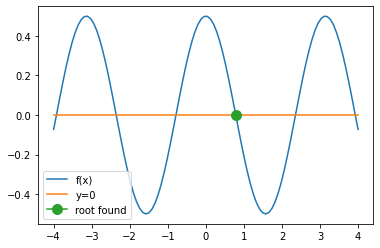

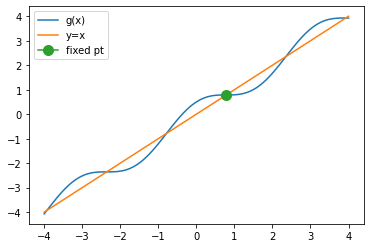

In [3]:
# Example

def f(x):
    return np.cos(x)**2 - 0.5

def g(x):
    return f(x) + x

x_root, precision, _ = fixedpt_finding(g, 0.0, nIter=50)

print("Root:\t\tx= ", x_root)
print("Precision:\tdx=", precision)

xd = np.linspace(-4,4,100)

# Plot f(x) and see if the estimated root is in the right place
plt.figure()
plt.plot(xd, f(xd),label='f(x)')
plt.plot(xd, np.zeros(len(xd)),label='y=0')
plt.plot(x_root, f(x_root),marker='o',markersize=10, label='root found')
plt.legend()

# Plot g(x) and visualize the fixed point
plt.figure()
plt.plot(xd, g(xd),label='g(x)')
plt.plot(xd, xd,label='y=x')
plt.plot(x_root, g(x_root),marker='o',markersize=10, label='fixed pt')
plt.legend()

plt.show()

## Exercise 1
a. Use the iterative relaxation method to find the root of $f(x) = \cos(x)-x$. Print your solution and precision. Make a plot of the guessed value of the root vs. iteration number to demonstrate the convergence to the solution. Feel free to use the function defined above.

b. Now use the iterative relaxation method to find a root of $f(x) = \cos(x)$. Print your solution and precision. Plot the value vs. iteration number. Compare your answer to the analytical value.

c. Now find the root of $f(x) = e^{x}-x-2$. Print your solution and precision, and plot the value vs. iteration number. Try a few different guesses and numbers of iterations. How many roots does this function have? How many were you able to find using this method?

d. Lastly, use this method to find the root of $f(x) = \cos(\frac{\pi x}{2})-x$. Print your solution and precision. Plot the value vs. iteration number. Does the method converge to a solution? Does a root exist for this function?

Root:		x=  0.7390851321663374
Precision:	dx= 3.8684536685096305e-09


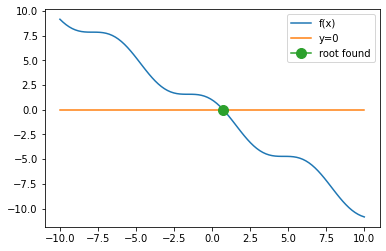

In [4]:
def f(x):
    return np.cos(x)-x
def g(x):
    return f(x)+x

x_root, precision, _ = fixedpt_finding(g, 0.0, nIter=50)

xd = np.linspace(-10,10,100)

print("Root:\t\tx= ", x_root)
print("Precision:\tdx=", precision)

plt.figure()
plt.plot(xd, f(xd),label='f(x)')
plt.plot(xd, np.zeros(len(xd)),label='y=0')
plt.plot(x_root, f(x_root),marker='o',markersize=10, label='root found')
plt.legend()

Root:		x=  1.5707963267948966
Precision:	dx= 0.0


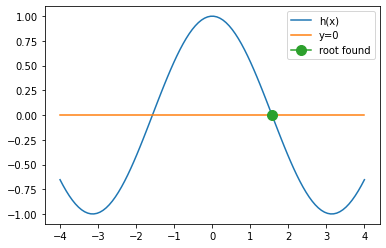

In [5]:
def h(x):
    return np.cos(x)
def g(x):
    return h(x)+x
x_root, precision, _ = fixedpt_finding(g, 0.0, nIter=50)

xd = np.linspace(-4,4,100)

print("Root:\t\tx= ", x_root)
print("Precision:\tdx=", precision)

plt.figure()
plt.plot(xd, h(xd),label='h(x)')
plt.plot(xd, np.zeros(len(xd)),label='y=0')
plt.plot(x_root, h(x_root),marker='o',markersize=10, label='root found')
plt.legend()

Root:		x=  -1.8414056604369606
Precision:	dx= 0.0


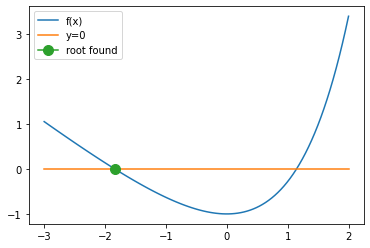

In [6]:
def p(x):
    return np.exp(x)-x-2
def g(x):
    return p(x)+x

x_root, precision, _ = fixedpt_finding(g, 1.0, nIter=50)

xd = np.linspace(-3,2,100)

print("Root:\t\tx= ", x_root)
print("Precision:\tdx=", precision) # I noticed there are 2 roots here

plt.figure()
plt.plot(xd, p(xd),label='f(x)')
plt.plot(xd, np.zeros(len(xd)),label='y=0')
plt.plot(x_root, p(x_root),marker='o',markersize=10, label='root found')
plt.legend()

Root:		x=  1.1102230246251565e-16
Precision:	dx= 0.9999999999999999


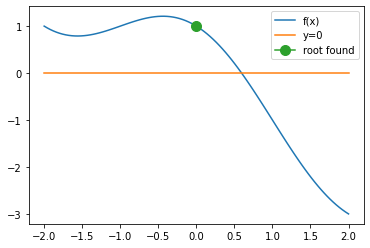

In [14]:
def q(x):
    return np.cos((np.pi*x)/2)-x
def g(x):
    return q(x)+x

x_root, precision, _ = fixedpt_finding(g, .5, nIter=50)

xd = np.linspace(-2,2,100)

print("Root:\t\tx= ", x_root)
print("Precision:\tdx=", precision)

plt.figure()
plt.plot(xd, q(xd),label='f(x)')
plt.plot(xd, np.zeros(len(xd)),label='y=0')
plt.plot(x_root, q(x_root),marker='o',markersize=10, label='root found')
plt.legend()
# this example does not show the root

### Root finding using the bisection method

First we introduce the `bisect` algorithm which is (i) robust and (ii) slow but conceptually very simple.

Suppose we need to compute the roots of 

$$f(x) = x^3 - 2x^2$$

This function has a roots at $x=0, 2$. Run the cell below to generate a plot of $f(x)$. What do you notice about how the function behaves around each of these two zeros?

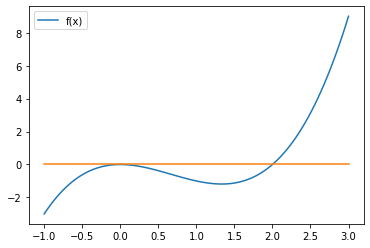

In [16]:
def f(x):
    return x ** 3 - 2 * x ** 2

# Visualize f(x) and see the roots
xd = np.linspace(-1,3,100)
yd = f(xd)
plt.figure()
plt.plot(xd,yd, label='f(x)')
plt.plot(xd,np.zeros(len(xd)))
plt.legend()
plt.show()

Indeed, the `bisect` method operates on the "Intermediate Value Theorem" which just makes the observation that if a continuous function $f(x)$ changes sign over an interval $x\in [a,b]$, then there must exist at least one value of $x$ in that interval for which $f(x) = 0$. As a result, this method cannot find the root at $x=0$. So to use `scipy.optimize.bisect` you need to give it three arguments: the name of the python function which encodes $f(x)$, the left end of your interval ($a$) and the right end of your interval $b$. But further more, $a$ and $b$ must be such that $f(a)$ and $f(b)$ have opposite sign. Try changing some of these values in the call to `bisect` below!

In [17]:
from scipy.optimize import bisect

x_root = bisect(f, 1.5, 3, xtol=1e-6) #xtol is an optional argument specifying how precise we want the answer

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x_root))
print("The exact error is %g." % (2 - x_root))

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


## Exercise 2
a. Use the built-in `bisect` function to compute the roots of the four functions from Exercise 2, and compare the results. Was the bisect method able to find all of the roots of $f(x) = e^{x} - x - 2$? What about for $f(x) = \cos(\frac{\pi x}{2})-x$?


In [21]:
def f(x):
    return np.cos(x)-x
x_root1 = bisect(f, .1, 2, xtol=1e-7)
print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x_root1))
print("The exact error is %g." % (2 - x_root1))


The root x is approximately x=0.739085146785,
the error is less than 1e-6.
The exact error is 1.26091.


In [32]:
x_root2 = bisect(h, np.pi, 6, xtol=1e-7)
print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x_root2))
print("The exact error is %g." % (2 - x_root2))


The root x is approximately x= 4.71238891566,
the error is less than 1e-6.
The exact error is -2.71239.


In [39]:
x_root3 = bisect(p, -3, 1, xtol=1e-7)
print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x_root3))
print("The exact error is %g." % (2 - x_root3))
## This method clearly does not account for the 2 roots; only 1

The root x is approximately x=-1.84140568972,
the error is less than 1e-6.
The exact error is 3.84141.


In [40]:
x_root4 = bisect(q, 0, 2, xtol=1e-7)
print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x_root4))
print("The exact error is %g." % (2 - x_root4))

The root x is approximately x= 0.59461158514,
the error is less than 1e-6.
The exact error is 1.40539.


### Root finding using Brent method

This is another method to find a root of the function $f(x)$ on the sign changing interval $x\in[a , b]$. It is a safe version of the secant method that uses inverse quadratic extrapolation. Brent’s method combines a few other elementary root-finding techniques: root bracketing, interval bisection, and inverse quadratic interpolation. But again, this still requires that $f(a)$ and $f(b)$ have opposite signs.

In [10]:
from scipy.optimize import brentq

def f(x):
    return x ** 3 - 2 * x ** 2

x = brentq(f, 0.5,3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000000005,
the error is less than 1e-6.
The exact error is -4.75548e-11.


### Root finding using the `fsolve` function

A (often) better (in the sense of “more efficient”) algorithm than the bisection algorithm is implemented in the general purpose `fsolve()` function for root finding of (multidimensional) functions. This algorithm needs only one starting point close to the suspected location of the root (but is not garanteed to converge).

Here is an example:

In [11]:
from scipy.optimize import fsolve

def f(x,a,b):
    return a*x**3 - b*x**2

a = 1
b = 2
x = fsolve(f, x0=[-0.5,3], args=(a,b))           # look for two roots starting with 0 and 3

print("Number of roots is", len(x))
print("The root(s) are ", x)

Number of roots is 2
The root(s) are  [-1.86238792e-26  2.00000000e+00]


The input to `fsolve` is the name of the python function and the array of initial locations for the roots you are trying to find. You can optionally pass additional arguments (parameters) to the function as a list with the keyword `args`. The return value of `fsolve` is a numpy array of the best estimates of the locations of the roots found for each initial guess given. If $n$ initial guesses are given, $n$ estimates are returned.

## Exercise 3 

Find the solutions of the quadratic equation $ax^2 + bx + c=0$ for an arbitrary set of coefficients $a$, $b$, $c$ using `fslove` , and compare to the exact solution.

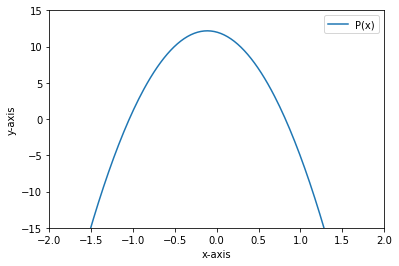

The 1th Root is -1.0447937749
The 2th Root is 0.8203942996


In [15]:
def function(x):
    return -14*(x**2)-np.pi*(x)+12
x_val = np.linspace(-10,10, 1000)


plt.plot(x_val,function(x_val), label = 'P(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xlim(-2, 2)
plt.ylim(-15, 15)
plt.legend()
plt.show()

roots = fsolve(function, [-1.6843, .2374]) 
print("The 1th Root is {0:3.10f}".format(roots[0]))
print("The 2th Root is {0:3.10f}".format(roots[1]))


## Exercise 4 
(Newman 6.15)

Consider a sixth-order polynomial 
$$P(x) = 924x^6 - 2772x^5 + 3150x^4 -1680x^3 +420x^2 -42x + 1$$
There is no general formula for the roots of a polynomial of degree 6, but you can compute the roots numerically. 
1. Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting it find rough values for the six roots of the polynomial. 
1. Write the code to solve for the positions of all six roots to at least ten decimal places using at least one of the methods above (you can use the built-in functions).

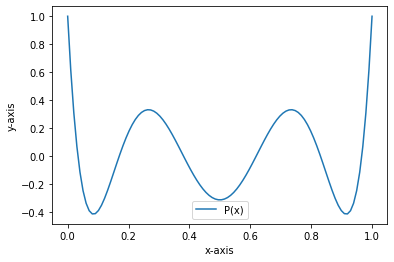

In [13]:
from scipy.optimize import fsolve
def P(x): 
    return 924*x**6 - 2772*x**5 + 3150*x**4 -1680*x**3 +420*x**2 -42*x + 1
x = np.linspace(0, 1, 100)

plt.plot(x,P(x), label = 'P(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

In [14]:
roots = fsolve(P, [.6843, .2374, .99239, .7635, .29374, .937476377]) 

print("The 0th Root is {0:3.10f}".format(roots[0]))
print("The 1th Root is {0:3.10f}".format(roots[1]))
print("The 2nd Root is {0:3.10f}".format(roots[2]))
print("The 3rd Root is {0:3.10f}".format(roots[3]))
print("The 4th Root is {0:3.10f}".format(roots[4]))
print("The 5th Root is {0:3.10f}".format(roots[5]))



The 0th Root is 0.6193095934
The 1th Root is 0.1693953080
The 2nd Root is 0.9662347566
The 3rd Root is 0.8306046944
The 4th Root is 0.3806904109
The 5th Root is 0.9662347568
